In [41]:
from matplotlib import pyplot as plt
from termcolor import colored
import cartopy.crs as ccrs
import matplotlib.colors as colors
import xarray as xr
import numpy as np
import cartopy
import matplotlib.gridspec as gridspec
from glob import iglob
from os.path import join
from functools import reduce
import pandas as pd
import harp
from harp._harppy import NoDataError, CLibraryError
import itertools
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
from os.path import exists
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

In [219]:
NO2_PATH = "../eodag_workspace/S5P_OFFL_L2__NO2____20190809T113145_20190809T131315_09436_01_010302_20190815T135735"
AER_PATH = "../eodag_workspace/S5P_OFFL_L2__AER_AI_20190809T113145_20190809T131315_09436_01_010302_20190815T105349"
HCHO_PATH = "../eodag_workspace/S5P_OFFL_L2__HCHO___20190202T100646_20190202T114816_06768_01_010105_20190208T120745"
SO2_PATH = "../eodag_workspace/S5P_OFFL_L2__SO2____20190202T100646_20190202T114816_06768_01_010105_20190208T192211"

In [220]:
with xr.open_dataset(NO2_PATH) as no2_data_GA:
    print(colored("Global attributes of NO2 Product:\n", "blue"), no2_data_GA)

Global attributes of NO2 Product:
 <xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:                        CF-1.7
    institution:                        KNMI
    source:                             Sentinel 5 precursor, TROPOMI, space-...
    summary:                            TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id:                        5dee9789-ee13-449f-b207-2dbc9451ef7f
    id:                                 S5P_OFFL_L2__NO2____20190809T113145_2...
    time_reference:                     2019-08-09T00:00:00Z
    time_reference_days_since_1950:     25422
    time_reference_julian_day:          2458704.5
    time_reference_seconds_since_1970:  1565308800
    time_coverage_start:                2019-08-09T11:53:19Z
    time_coverage_end:                  2019-08-09T12:51:43Z
    time_coverage_duration:             PT3503.558S
    time_coverage_resolution:           PT0.840S
    orbit:                              9436
    

In [221]:
with xr.open_dataset(NO2_PATH, group = "METADATA/GRANULE_DESCRIPTION") as no2_data_MT:
    print(colored("METADATA/GRANULE_DESCRIPTION Group:\n", "blue"), no2_data_MT)

METADATA/GRANULE_DESCRIPTION Group:
 <xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    GranuleStart:                            2019-08-09T11:53:19Z
    GranuleEnd:                              2019-08-09T12:51:43Z
    InstrumentName:                          TROPOMI
    MissionName:                             Sentinel-5 precursor
    MissionShortName:                        S5P
    ProcessLevel:                            2
    ProcessingCenter:                        PDGS-OP
    ProcessingNode:                          s5p-off-pn41
    ProcessorVersion:                        1.3.2
    ProductFormatVersion:                    10100
    ProcessingMode:                          Offline
    LongitudeOfDaysideNadirEquatorCrossing:  18.30098
    ProductShortName:                        L2__NO2___


In [222]:
with xr.open_dataset(NO2_PATH, group = "PRODUCT") as no2_data_PRD:
    print(colored("PRODUCT Group:\n", "blue"), no2_data_PRD)

PRODUCT Group:
 <xarray.Dataset>
Dimensions:                                               (corner: 4, ground_pixel: 450, intensity_offset_polynomial_exponents: 1, layer: 34, polynomial_exponents: 6, scanline: 4172, time: 1, vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                         

In [223]:
date = no2_data.attrs["time_reference"][:no2_data.attrs["time_reference"].find("T")]
date

'2019-02-02'

In [224]:
no2 = no2_data_PRD["nitrogendioxide_tropospheric_column"]
print(colored('Dimensions: names for each axis eg. ("x", "y", "z"):\n', "blue"), no2.dims)
print(colored('\nCoordinates: dict-like container of arrays that label each point:\n', "blue"))
pp.pprint(no2.coords)
print(colored('\nAttributes: dict to hold arbitrary metadata (attributes):\n', "blue"))
pp.pprint(no2.attrs)
print(colored('\nValues: a numpy.ndarray holding the array values:\n', "blue"))
pp.pprint(no2.attrs)

Dimensions: names for each axis eg. ("x", "y", "z"):
 ('time', 'scanline', 'ground_pixel')

Coordinates: dict-like container of arrays that label each point:

Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2019-08-09
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...

Attributes: dict to hold arbitrary metadata (attributes):

{   'ancillary_variables': 'nitrogendioxide_tropospheric_column_precision '
                           'air_mass_factor_troposphere air_mass_factor_total '
                           'averaging_kernel',
    'long_name': 'Tropospheric vertical column of nitrogen dioxide',
    'multiplication_factor_to_convert_to_molecules_percm2': 6.02214e+19,
    'standard_name': 'troposphere_mole_content_of_nitrogen_dioxide',
    'units': 'mol m-2'}

Value

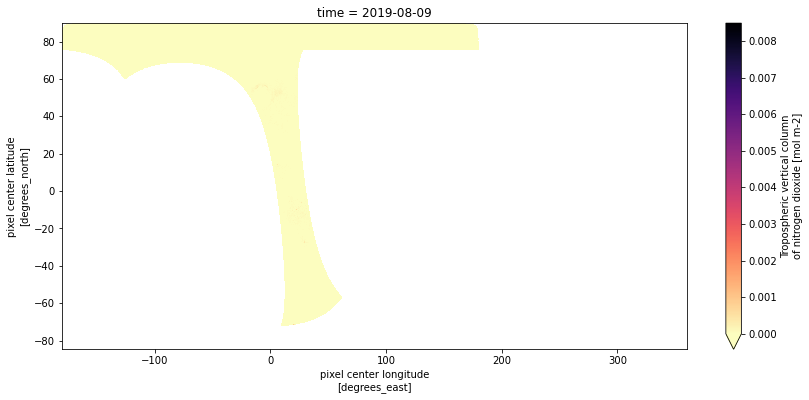

In [225]:
no2_converted = no2 #* no2.multiplication_factor_to_convert_to_molecules_percm2 
fig, ax = plt.subplots(figsize = (14,6))
no2_converted[0].plot.pcolormesh(ax=ax, x="longitude", y="latitude", add_colorbar=True, cmap="magma_r",
                      vmin=0)

In [ ]:
fig, ax = plt.subplots(figsize=(14,6), subplot_kw={'projection':ccrs.Orthographic(11,42)})
no2_converted[0].plot.pcolormesh(ax=ax, x="longitude", y="latitude", 
                                 add_colorbar=True, cmap="Reds", 
                                 transform = ccrs.PlateCarree(),
                                 vmin=0, vmax = 0.9e16)
#ax.add_feature(cartopy.feature.RIVERS)
ax.set_title("Title")
ax.coastlines("10m")
ax.set_global() # GLOBAL
#ax.set_extent ((-7.5, 50, 34, 69), ccrs.PlateCarree()) # EUROPE
#ax.set_extent ((5.98865807458, 47.3024876979, 15.0169958839, 54.983104153), ccrs.PlateCarree()) # GERMANY
ax.add_feature(cartopy.feature.LAND, edgecolor ="black")
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)


C:\tools\miniconda3\envs\SatellitalTest\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


C:\tools\miniconda3\envs\SatellitalTest\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


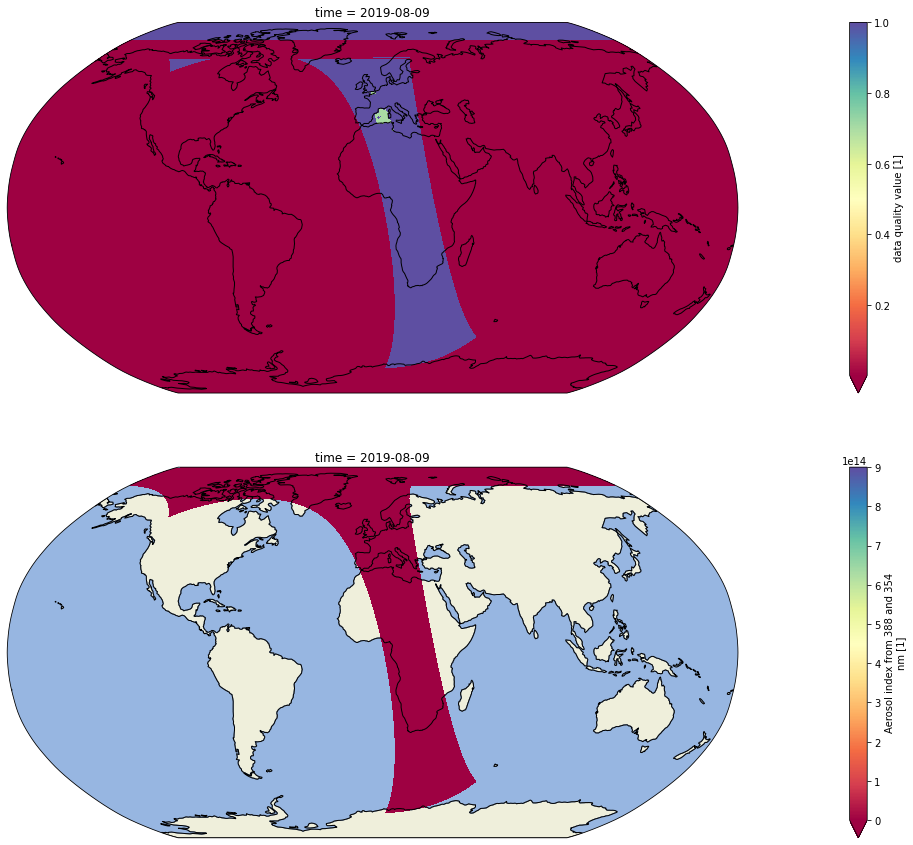

In [199]:
no2_filter = no2_converted.where(no2_data_PRD["qa_value"] > 0.6, drop = True)

plt.figure(figsize=(40,15))

ax1 = plt.subplot(211, projection=ccrs.Robinson())
ax1.add_feature(cartopy.feature.LAND, edgecolor="black")
ax1.add_feature(cartopy.feature.OCEAN)
ax1.coastlines()
no2_data_PRD["qa_value"][0].plot.pcolormesh(ax=ax1, x="longitude", y="latitude",
                                            add_colorbar=True, cmap= "Spectral",
                                           transform = ccrs.PlateCarree(), vmin = 0.001)

ax1.set_global()

ax2 = plt.subplot(212, projection=ccrs.Robinson())
no2_filter[0].plot.pcolormesh(ax=ax2, x="longitude", y="latitude",
                                            add_colorbar=True, cmap= "Spectral",
                                           transform = ccrs.PlateCarree(),
                                           vmin=0, vmax = 0.9e15  )
ax2.add_feature(cartopy.feature.LAND, edgecolor="black")
ax2.add_feature(cartopy.feature.OCEAN)
ax2.coastlines()
ax2.set_global()

C:\tools\miniconda3\envs\SatellitalTest\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


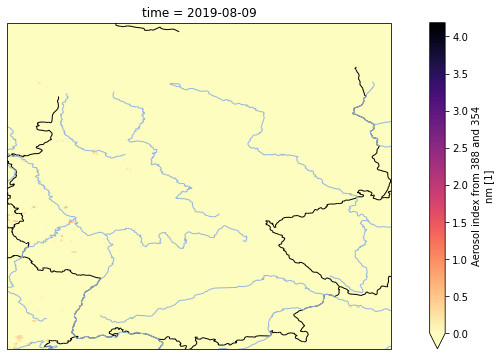

In [202]:
ur=(48.79011034, 9.18837298)
ll = (48.77914388, 9.17268817)

no2_subset = no2_converted.where((no2_filter.longitude < ur[1])&(no2_filter.longitude > ll[1])&
                               (no2_filter.latitude < ur[0])&(no2_filter.latitude > ll[0]))

fig, ax3 = plt.subplots(figsize=(14,6),subplot_kw={'projection':ccrs.PlateCarree()})

land_10m = cf.NaturalEarthFeature("physical", "land", "10m", edgecolor="face", facecolor = cf.COLORS["land"])

#ax3.add_feature(land_10m)
no2_converted[0].plot.pcolormesh(ax=ax3, x="longitude", y="latitude", add_colorbar=True,
                              cmap="magma_r", transform=ccrs.PlateCarree(), vmin = 0)

ax3.coastlines("10m", zorder = -3)
ax3.add_feature(cartopy.feature.LAND, edgecolor ="black")
ax3.add_feature(cartopy.feature.OCEAN)
ax3.add_feature(cartopy.feature.BORDERS)
ax3.set_extent((9.0, 9.4,48.7, 48.9), ccrs.PlateCarree()) 
ax3.add_feature(cartopy.feature.RIVERS)
ax3.set_extent ((5.98865807458,  15.0169958839, 47.3024876979, 54.983104153), ccrs.PlateCarree())